In [29]:
# Import only the allowed libraries
import csv
from collections import Counter, defaultdict
import statistics
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pandas as pd

print("SALES DATA ANALYZER PROJECT")


SALES DATA ANALYZER PROJECT


In [13]:
df = pd.read_csv('retail_sales_dataset.csv', encoding = 'ISO-8859-1')
#showe the first 5 rows
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [20]:
# Load and CLEAN the data

filename = "retail_sales_dataset.csv"

if not os.path.exists(filename):
    print(f"ERROR: {filename} not found!")
    print("Please place the CSV file in this folder.")
    exit()

sales = []
skipped = 0

print("Loading and cleaning data")

with open(filename, newline="", encoding="utf-8") as f:
    reader = csv.DictReader(f)
    
    for row_num, row in enumerate(reader, start=2):
        try:
            # Safely extract and clean each field
            qty_str = row["Quantity"].strip()
            price_str = row["Price per Unit"].strip()
            category = row["Product Category"].strip()
            date = row["Date"].strip()

            # Convert to numbers with error handling
            quantity = int(qty_str)
            price = float(price_str)

            # Final validation (just in case!)
            if quantity <= 0 or price <= 0:
                print(f"Row {row_num}: Invalid quantity/price → skipped")
                skipped += 1
                continue
            if not category or len(category) == 0:
                print(f"Row {row_num}: Missing product category → skipped")
                skipped += 1
                continue

            # All good → add to list
            sales.append({
                "date": date,
                "product": category,
                "quantity": quantity,
                "price": price,
                "total": quantity * price
            })

        except ValueError:
            print(f"Row {row_num}: Bad number format → skipped")
            skipped += 1
        except KeyError as e:
            print(f"Row {row_num}: Missing column {e} → skipped")
            skipped += 1
        except Exception as e:
            print(f"Row {row_num}: Unknown error → {e} → skipped")
            skipped += 1

print(f"\nLoading complete!")
print(f"   Successfully loaded : {len(sales)} records")
print(f"   Skipped (bad data)  : {skipped} rows")
if skipped == 0:
    print("   All data was perfectly clean!")

Loading and cleaning data

Loading complete!
   Successfully loaded : 1000 records
   Skipped (bad data)  : 0 rows
   All data was perfectly clean!


In [21]:
# Data processing using loops, lists, and dictionaries

total_revenue = 0
product_quantity = Counter()
product_revenue = defaultdict(float)
monthly_revenue = defaultdict(float)
all_sale_values = []

for sale in sales:
    total_revenue += sale["total"]
    product_quantity[sale["product"]] += sale["quantity"]
    product_revenue[sale["product"]] += sale["total"]
    all_sale_values.append(sale["total"])
    
    month = sale["date"][:7]  # YYYY-MM
    monthly_revenue[month] += sale["total"]

# Calculate average using statistics module
average_sale = statistics.mean(all_sale_values) if all_sale_values else 0

print("BUSINESS PERFORMANCE SUMMARY")
print("="*55)
print(f"Total Revenue         : UGX {total_revenue:,.0f}")
print(f"Total Transactions    : {len(sales)}")
print(f"Average Sale Amount   : UGX {average_sale:,.0f}")
print(f"Total Units Sold      : {sum(product_quantity.values()):,}")

BUSINESS PERFORMANCE SUMMARY
Total Revenue         : UGX 456,000
Total Transactions    : 1000
Average Sale Amount   : UGX 456
Total Units Sold      : 2,514


In [22]:
#Top products using Counter

print("\nTOP 5 PRODUCT CATEGORIES BY QUANTITY SOLD")
top_by_qty = product_quantity.most_common(5)
for i, (cat, qty) in enumerate(top_by_qty, 1):
    rev = product_revenue[cat]
    print(f"{i}. {cat:<15} → {qty:>5} units → UGX {rev:,.0f}")

print("\nTOP 5 PRODUCT CATEGORIES BY REVENUE")
top_by_rev = sorted(product_revenue.items(), key=lambda x: x[1], reverse=True)[:5]
for i, (cat, rev) in enumerate(top_by_rev, 1):
    qty = product_quantity[cat]
    print(f"{i}. {cat:<15} → UGX {rev:,.0f} ({qty} units)")


TOP 5 PRODUCT CATEGORIES BY QUANTITY SOLD
1. Clothing        →   894 units → UGX 155,580
2. Electronics     →   849 units → UGX 156,905
3. Beauty          →   771 units → UGX 143,515

TOP 5 PRODUCT CATEGORIES BY REVENUE
1. Electronics     → UGX 156,905 (849 units)
2. Clothing        → UGX 155,580 (894 units)
3. Beauty          → UGX 143,515 (771 units)


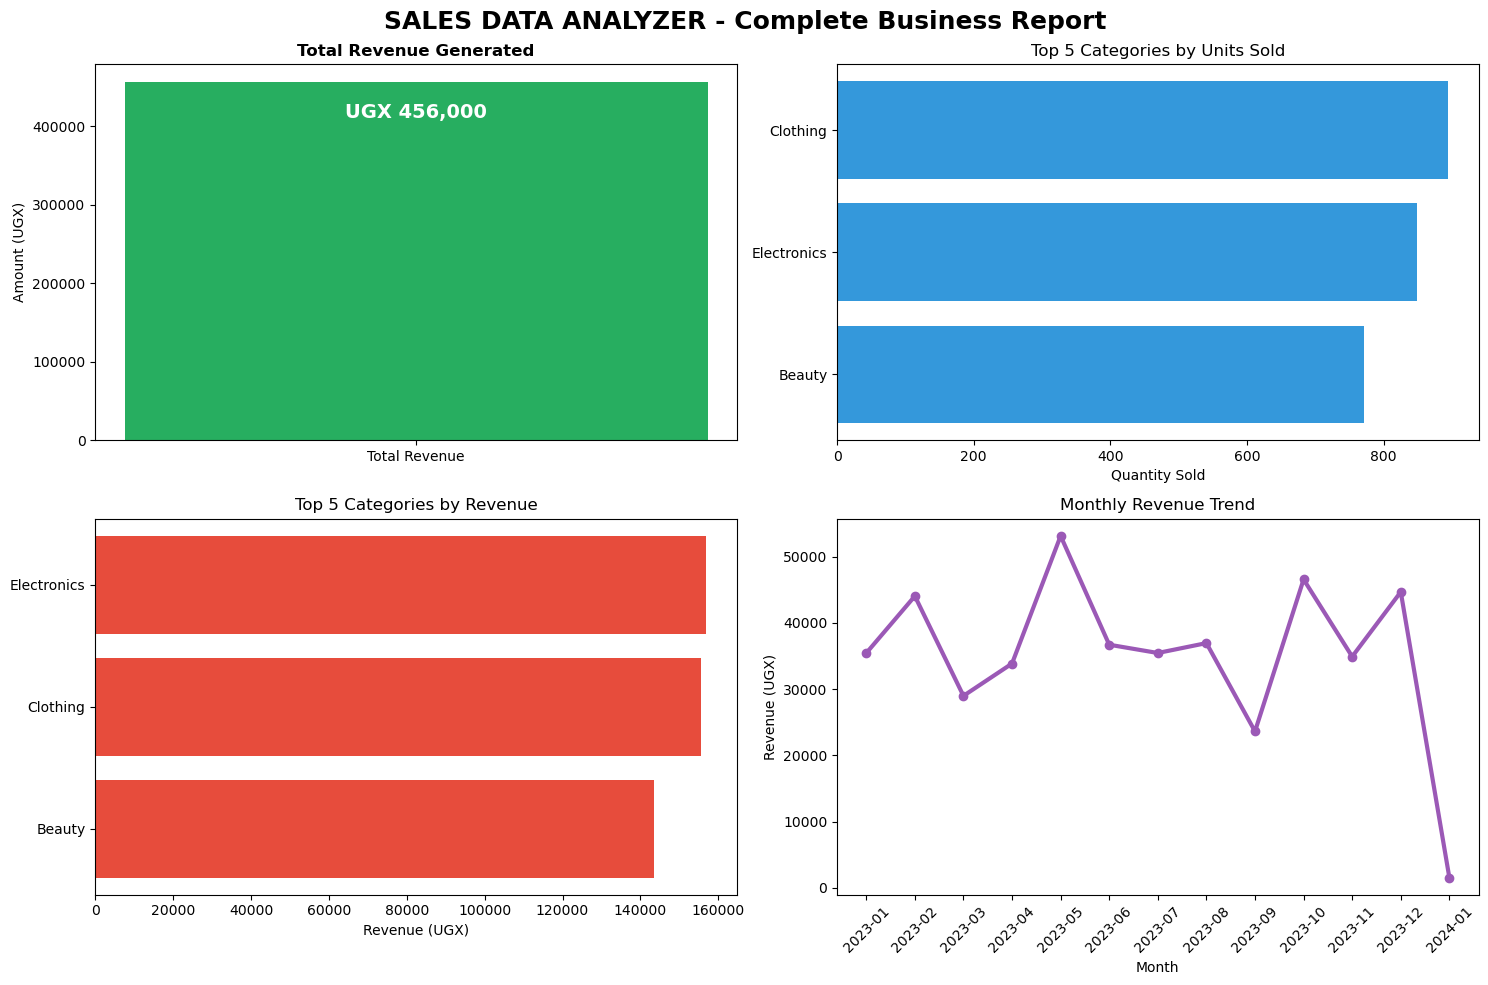

In [23]:
# Visual Reports using matplotlib

plt.figure(figsize=(15, 10))

# Total Revenue
plt.subplot(2, 2, 1)
plt.bar(["Total Revenue"], [total_revenue], color="#27ae60", width=0.6)
plt.title("Total Revenue Generated", fontweight="bold")
plt.ylabel("Amount (UGX)")
plt.text(0, total_revenue*0.9, f"UGX {total_revenue:,.0f}", 
         ha="center", color="white", fontweight="bold", fontsize=14)

# Top 5 by Quantity
plt.subplot(2, 2, 2)
cats_qty = [x[0] for x in top_by_qty][::-1]
qty_vals = [x[1] for x in top_by_qty][::-1]
plt.barh(cats_qty, qty_vals, color="#3498db")
plt.title("Top 5 Categories by Units Sold")
plt.xlabel("Quantity Sold")

# Top 5 by Revenue
plt.subplot(2, 2, 3)
cats_rev = [x[0] for x in top_by_rev][::-1]
rev_vals = [x[1] for x in top_by_rev][::-1]
plt.barh(cats_rev, rev_vals, color="#e74c3c")
plt.title("Top 5 Categories by Revenue")
plt.xlabel("Revenue (UGX)")

# Monthly Trend
plt.subplot(2, 2, 4)
months = sorted(monthly_revenue.keys())
revenue_by_month = [monthly_revenue[m] for m in months]
plt.plot(months, revenue_by_month, marker="o", linewidth=3, color="#9b59b6")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (UGX)")
plt.xticks(rotation=45)

plt.suptitle("SALES DATA ANALYZER - Complete Business Report", 
             fontsize=18, fontweight="bold", y=0.98)
plt.tight_layout()
plt.show()